In [159]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [160]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [161]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [163]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [164]:
# Normalization
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [166]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))  # Sigmoid for binary classification


In [167]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_15 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_16 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [168]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [169]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 105ms/step - loss: 1.4267 - accuracy: 0.5914 - val_loss: 0.6237 - val_accuracy: 0.6396
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6352 - accuracy: 0.6490 - val_loss: 0.8075 - val_accuracy: 0.6360
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5713 - accuracy: 0.7120 - val_loss: 1.6157 - val_accuracy: 0.5012
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5166 - accuracy: 0.7513 - val_loss: 0.5276 - val_accuracy: 0.7520
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4672 - accuracy: 0.7771 - val_loss: 0.4956 - val_accuracy: 0.7756
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4169 - accuracy: 0.8101 - val_loss: 0.4775 - val_accuracy: 0.7862
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3637 - accuracy: 0.8330 - val_loss: 0.5017 - val_ac

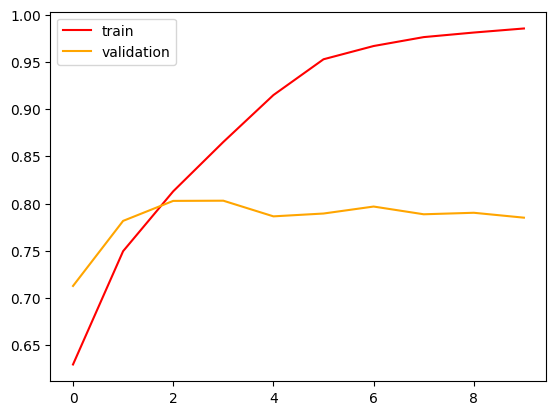

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='validation')
plt.legend()
plt.show()

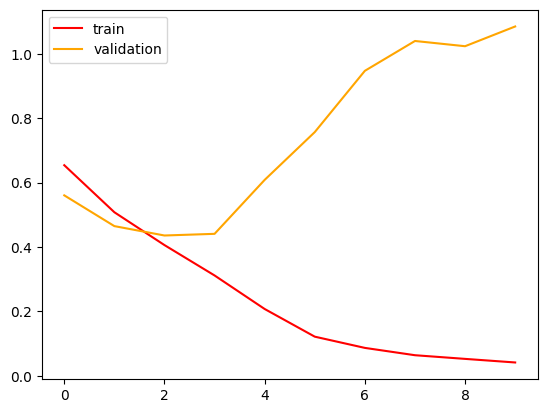

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='orange',label='validation')
plt.legend()
plt.show()

In [ ]:
# Reducing overfitting use BatchNormalization

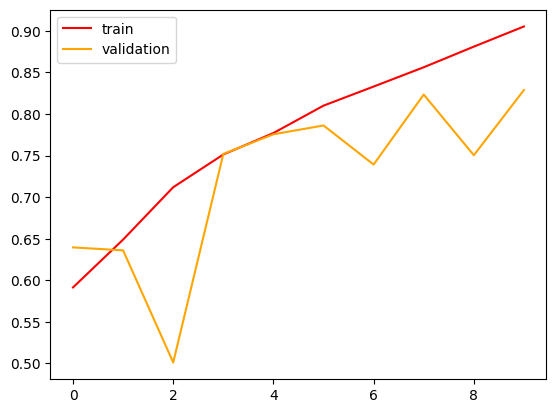

In [184]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='validation')
plt.legend()
plt.show()

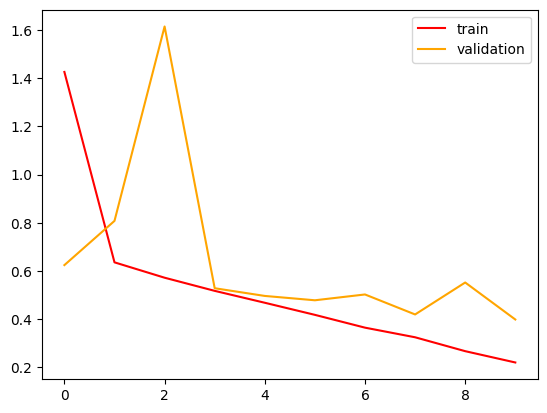

In [185]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='orange',label='validation')
plt.legend()
plt.show()

In [170]:
import cv2

In [171]:
test_img = cv2.imread('/content/cat.jpeg')

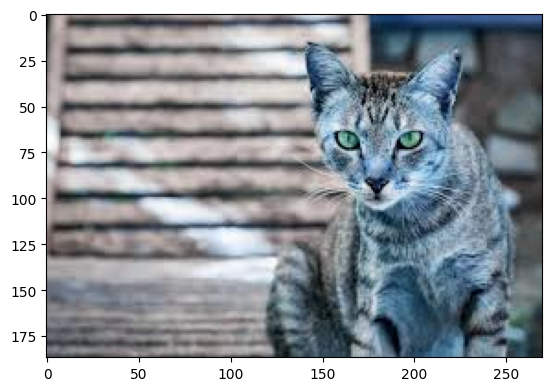

In [172]:
plt.imshow(test_img)

In [174]:
test_img.shape

(187, 270, 3)

In [175]:
test_img = cv2.resize(test_img,(256,256))

In [176]:
test_input = test_img.reshape((1,256,256,3))

In [177]:
model.predict(test_input)

1/1 [==============================] - 0s 122ms/step


array([[0.]], dtype=float32)

In [178]:
test_img = cv2.imread('/content/dog.jpg')

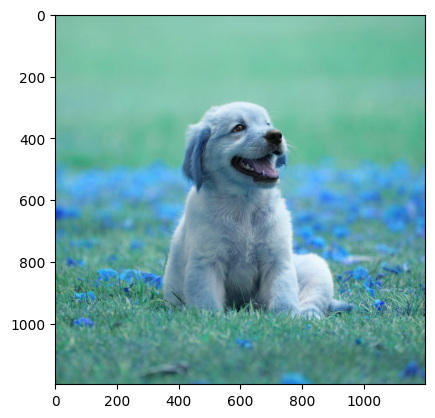

In [179]:
plt.imshow(test_img)

In [180]:
test_img.shape

(1197, 1200, 3)

In [181]:
test_img = cv2.resize(test_img,(256,256))

In [182]:
test_input = test_img.reshape((1,256,256,3))

In [183]:
model.predict(test_input)

1/1 [==============================] - 0s 31ms/step


array([[1.]], dtype=float32)